# The second homework assignment for CSE427
## Author: [Jae Park] ID:[jpark58]

## Notebook Set Up
click the `File` and select the `save a copy in drive`, then rename the notebook as `CSE427-Assignment2-YOUR_NETID` and then you can edit the notebook

## Submission Instruction
Before you submit this assignment click the `Runtime` select the `Restart and run all` to make sure everything is fine. 

Create a share link with editing permission and submit the link to canvas.

## Resources
If you want to to learn more about matrix calculus, you can check the [wiki](https://en.wikipedia.org/wiki/Matrix_calculus)  or [Finding the Gradient of a Vector Function](https://towardsdatascience.com/step-by-step-the-math-behind-neural-networks-d002440227fb)

If you have problems using pandas you can check the [pandas guide](https://pandas.pydata.org/docs/user_guide/index.html).

If you don't know about markdown, you cen check the [basic syntax](https://www.markdownguide.org/basic-syntax/). 

You can use latex for the math or write the answer by hand and then upload the picture. 

You can also write by hand and then use [mathpix](https://mathpix.com) to convert to latex. Mathpix is very powerful!


## Download the data you will use in this assignment

In [ ]:
!pip3 install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --folder 1lQES_GSW35_JiG24L8TgtmUtI6vyt8J7

Retrieving folder list
Processing file 1_8nEYpYokUMgxmDUIHOMS3aWtymW_3Qr Q2.testing_expression.txt
Processing file 1JuLhB2dH5_YvpD1oppmnVR2lAZ51ZxFt Q2.testing_genotype.txt
Processing file 1yj6KOKNMaO32xv5vtVGi1QaqnUKJzlq_ Q2.training_expression.txt
Processing file 15wYs7Oh2kQPrxvYTMPJtdxkPRi_x1Ab6 Q2.training_genotype.txt
Processing file 1EG-pCSVNAfU0bN3Afy_m-HJaObCflk78 Q3.test.csv
Processing file 1UiZMMEch7Nfs2JoSoUlaOPcRqFp79Sq5 Q3.train_downsample.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1_8nEYpYokUMgxmDUIHOMS3aWtymW_3Qr
To: /content/data/Q2.testing_expression.txt
100% 2.10k/2.10k [00:00<00:00, 3.46MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JuLhB2dH5_YvpD1oppmnVR2lAZ51ZxFt
To: /content/data/Q2.testing_genotype.txt
100% 176k/176k [00:00<00:00, 88.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yj6KOKNMaO32xv5vtVGi1QaqnUKJzlq_
To: /content/d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from scipy.stats import pearsonr


## Question 1 (10 points)

### Question 1.1 (5 points)

Assume we have a dataset consisting of a matrix $X$ of n examples (rows) and p features (columns), and a continuous label vector y. We want to build a linear regression model to predict y from X using parameters $w = [w_1, w_2, ..., w_p]$.

1. Write the mathematical expression for the linear model for predicting y from X using the parameters W.

2. The objective function for linear regression can be defined as the mean squared error (MSE) between the predicted values and the true values of y. Write the mathematical expression for the objective function.


3. To find the optimal solution for the parameters $w$ of the linear model, we need to minimize the objective function $J(w)$. Derive the closed-form solution for w that minimizes $J(w)$.


## Your Answer:
Finish here

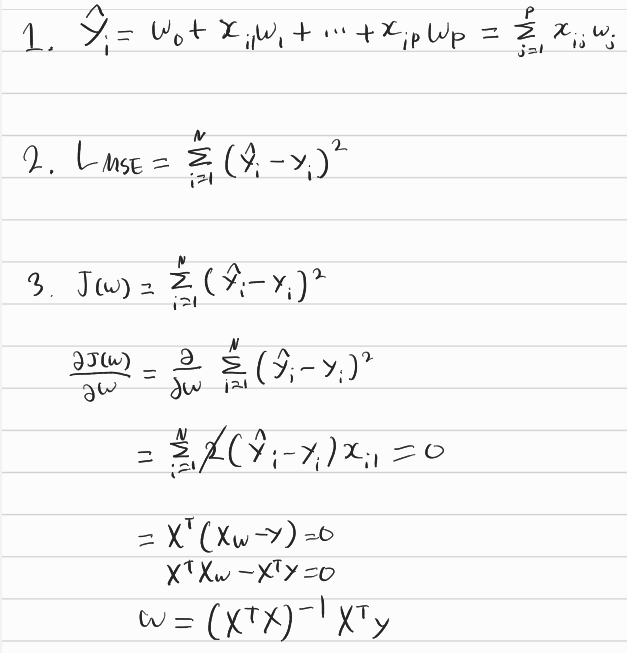

### Question 1.2 (5 points)

Same problem setting, but for ridge regression

1. The objective function for ridge regression can be defined as the sum of the mean squared error (MSE) between the predicted values and the true values of $y$ and a penalty term on the $L_2$ norm of the parameters $w$, multiplied by the regularization parameter $\lambda$. Write the mathematical expression for the objective function.


2. To find the optimal solution for the parameters w of the ridge regression model, we need to minimize the objective function $J(w)$. Derive the closed-form solution for $w$ that minimizes $J(w)$.

3. Speculate how $w$ would change when $\lambda$ is very small or very big. 

## Your Answer:
Finish here

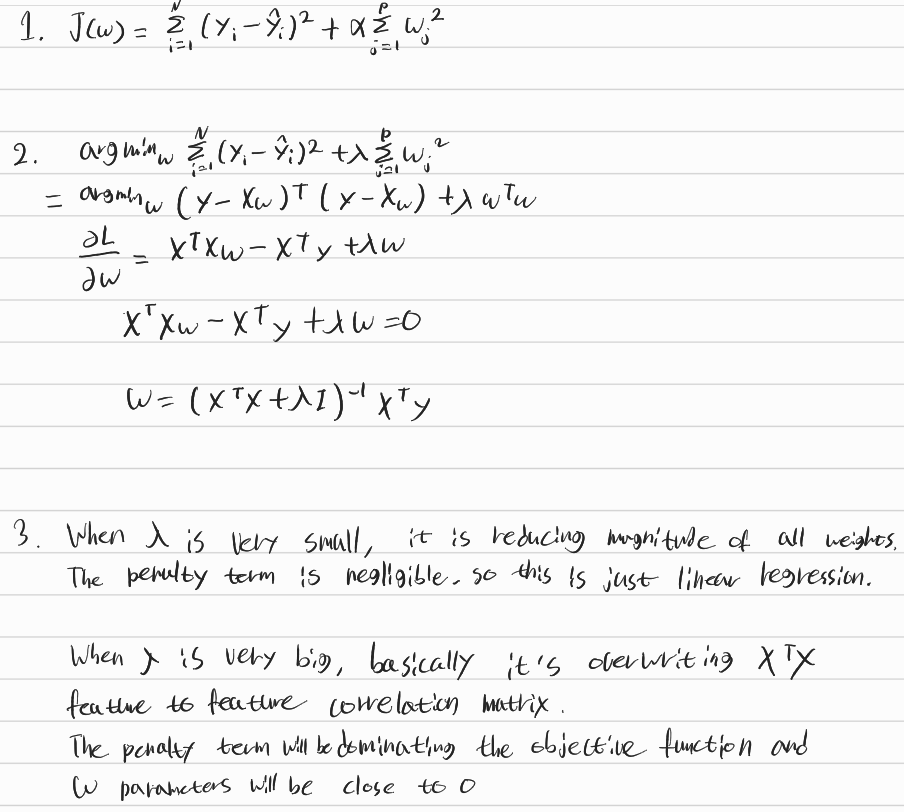

## Question 2 (10 points)

You have been given a dataset containing genotype and gene expression data for $922$ subjects for a particular gene called DDX11. Your task is to build a model to predict gene expression based on genotype data using linear regression.

The data has been split into training and testing sets for both $X$ (genotype data) and $y$ (gene expression data). The training sets will be used to train the model, and the testing sets will be used to evaluate its performance.

Here are the steps you should follow:
1. Load the data


In [ ]:
# Read the data
train_X = pd.read_csv('./data/Q2.training_genotype.txt', sep='\t', index_col=0)
train_y = pd.read_csv('./data/Q2.training_expression.txt', sep='\t', index_col=0)
test_X = pd.read_csv('./data/Q2.testing_genotype.txt', sep='\t', index_col=0)
test_y = pd.read_csv('./data/Q2.testing_expression.txt', sep='\t', index_col=0)


Check the train label 

In [ ]:
train_y

,DDX11
IDs,
LD0536,0.011093
LD0451,0.006380
LD0224,0.023480
LD0562,-0.048704
LD0313,0.027040
...,...
LD0420,-0.000960
LD1115,0.006890
LD0820,0.018669


In [ ]:
train_X

,rs11836056,rs12579700,rs2351206,rs7973806,rs10771627,rs10843600,rs1385558,rs1040274,rs1040275,rs11050645,...,rs2630590,rs1716946,rs12368929,rs11051756,rs1716945,rs10743775,rs2630594,rs1684119,rs2683467,rs7965238
IDs,,,,,,,,,,,,,,,,,,,,,
LD0536,2,2,2,1,2,2,1,1,1,2,...,2,2,1,2,2,2,2,1,2,2
LD0451,2,1,2,2,1,1,2,1,2,1,...,1,1,2,2,1,2,1,1,2,2
LD0224,2,2,2,1,2,2,1,1,1,2,...,1,1,2,1,1,0,2,2,2,1
LD0562,2,2,2,2,0,0,2,0,2,0,...,1,1,2,1,1,0,2,2,2,2
LD0313,2,1,2,2,1,1,2,1,2,1,...,2,2,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LD0420,2,2,2,0,2,2,2,2,2,2,...,2,2,2,2,2,1,2,2,2,1
LD1115,2,1,2,1,2,2,2,2,2,2,...,1,1,2,1,1,1,2,2,2,2
LD0820,2,2,2,0,2,2,2,2,2,2,...,1,1,2,1,1,1,2,1,2,1


### 2.1.a. Fit a linear regression model to predict gene expression from the SNP (single nucleotide polymorphism) values provided in the training dataset. Calculate the mean squared error (MSE) of the linear regression model on the training data. (2 points)

To fit a linear regression model, you can use a library or package in python (e.g. scikit-learn in Python). The input variables should be the SNP values from the training dataset, and the output variable should be the gene expression values from the training dataset. Once the model is trained, you can use it to make predictions on the same training data.

To calculate the mean squared error, you need to compare the predicted gene expression values to the true gene expression values in the training data, and compute the squared difference between them. Then, take the average of the squared differences to get the MSE. The formula for MSE is:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$

where n is the number of examples in the training data, $y_i$ is the true gene expression value for the i-th example, and $\hat{y_i}$ is the predicted gene expression value for the i-th example.

Report the MSE error of the linear regression model on the training data. This will give you an idea of how well your model is performing on the data it was trained on. A low MSE indicates that the model is able to make accurate predictions on the training data, while a high MSE indicates that the model is not performing well and may need to be adjusted.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit the model (hint: use the LinearRegression function and the .fit())
model = LinearRegression()
model.fit(train_X, train_y)

# Compute error on training data
train_pred = model.predict(train_X)

train_error = mean_squared_error(train_y, train_pred)

print('Training error: ', train_error)

Training error:  2.5244974183246635e-05


### 2.1.b. Use the model above to make predictions for the given gene in the test data. Show the MSE on the test data. (2 points)


In [ ]:
# Compute error on test data 
test_pred = model.predict(test_X)
test_error = mean_squared_error(test_y, test_pred)
print('Test error: ', test_error)

Test error:  3.562794709693822e+17


## Your Answer
Write the values for train and test MSE here

Training error:  2.5244974183246635e-05

Test error:  3.562794709693822e+17

### 2.2. Repeat the above analysis using ridge regression, with penalty parameters $[0.0001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 10000]$. (3 points)

For each different $\lambda$, we store the coeffients $w$. Compare the train and test error to the results from 2.1.a and 2.1.b. How does the choice of $\lambda$ affect the performance of the model? Which value of $\lambda$ gives the best performance on the test data?

In [ ]:
# ridge regression
from sklearn.linear_model import Ridge

# Fit a ridge regression model to predict gene expression from some SNP values provided on the training dataset. Compute the error on training data.
alpha_list = [0.0001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 10000]

coef_list = []
for alpha in alpha_list:
    model = Ridge(alpha=alpha)
    # Train the model
    model.fit(train_X, train_y)

    coef_list.append(model.coef_.reshape(-1))

    # Compute the error on training data and test data
    train_pred = model.predict(train_X)
    train_error = mean_squared_error(train_y, train_pred)
    test_pred = model.predict(test_X)
    test_error = mean_squared_error(test_y, test_pred)
    
    print('alpha: ', alpha, 'Training error: ', train_error, 'Test error: ', test_error)

# Plot the coefficients of the model as a function of alpha
coef_df = pd.DataFrame(coef_list, index=alpha_list)

alpha:  0.0001 Training error:  2.525112573801832e-05 Test error:  0.0005890249875152091
alpha:  0.01 Training error:  2.577532461494534e-05 Test error:  0.00044441149485396236
alpha:  0.1 Training error:  2.9303202377536787e-05 Test error:  0.00035208784571677564
alpha:  0.5 Training error:  3.613361929432732e-05 Test error:  0.00028678948812560024
alpha:  1 Training error:  4.043570432840911e-05 Test error:  0.0002536852411689025
alpha:  5 Training error:  5.284565427954564e-05 Test error:  0.00019181148986250493
alpha:  10 Training error:  5.9051070012051164e-05 Test error:  0.00017582888243617545
alpha:  50 Training error:  7.80682969102647e-05 Test error:  0.00015594588518721002
alpha:  100 Training error:  9.019032359074441e-05 Test error:  0.00015481605762843176
alpha:  500 Training error:  0.00013868228917854453 Test error:  0.0001782872660054906
alpha:  1000 Training error:  0.00018118613091099345 Test error:  0.00020968898334929417
alpha:  10000 Training error:  0.00051031770

Text(0.5, 1.0, 'Ridge regression coefficients as a function of alpha')

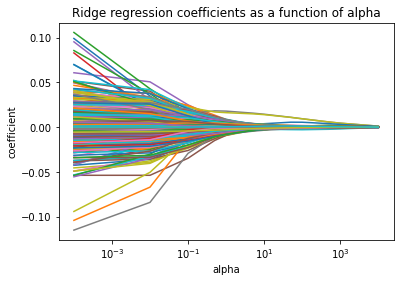

In [ ]:
# Plot the coefficients of the model as a function of alpha, alpha should be on the log scale
coef_df.plot(logx=True, legend=False)
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.title('Ridge regression coefficients as a function of alpha')

Text(0.5, 1.0, 'Number of non-zero coefficients as a function of alpha')

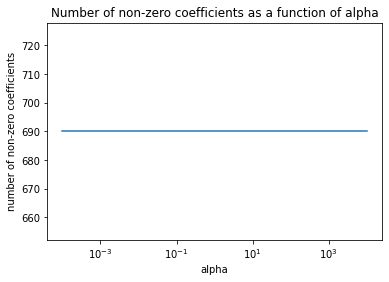

In [ ]:
# Plot the number of non-zero coefficients as a function of alpha
coef_df.apply(lambda x: x != 0).sum(axis=1).plot(logx=True)
plt.xlabel('alpha')
plt.ylabel('number of non-zero coefficients')
plt.title('Number of non-zero coefficients as a function of alpha')


## Your Answer
Written answer to 2.2 here

The choice of $λ$ affects the performance of the model a lot. When $λ$ increases, the training error increases and the test error decreases and the model is more regularized.
When $λ$ is too big such as 500, 1000, 10000, the performance is poor on both training and test because it's dominating X^TX. 

The best value of $λ$ that gives the best performance on the test data is 100 because it gives the lowest test error while not too big. Alpha values that are bigger than 100 are increasing test errors again.

### 2.3. Repeat the above with lasso regression, with penalty parameters $[1e-5, 1e-4, 1e-3, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]$. (3 points)

Compare the train and test error to the results from previous question. How does the choice of $\lambda$ affect the performance of the model? Which value of $\lambda$ gives the best performance on the test data? 

In [ ]:
# lasso regression
from sklearn.linear_model import Lasso

# Fit a lasso regression model to predict gene expression from some SNP values provided on the training dataset. Compute the error on training data.
alpha_list = [1e-5, 1e-4, 1e-3, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]

coef_list = []
for alpha in alpha_list:
    model = Lasso(alpha=alpha, max_iter=10000)
    # train your model
    model.fit(train_X, train_y)

    coef_list.append(model.coef_.reshape(-1))

    # Compute the error on training data and test data
    train_pred = model.predict(train_X)
    train_error = mean_squared_error(train_y, train_pred)
    test_pred = model.predict(test_X)
    test_error = mean_squared_error(test_y, test_pred)
    
    print('alpha: ', alpha, 'Training error: ', train_error, 'Test error: ', test_error)

# Plot the coefficients of the model as a function of alpha
coef_df = pd.DataFrame(coef_list, index=alpha_list)

alpha:  1e-05 Training error:  4.891672301413363e-05 Test error:  0.00021510244037175558
alpha:  0.0001 Training error:  8.961748565480754e-05 Test error:  0.0001336215991452474
alpha:  0.001 Training error:  0.00011555645093702636 Test error:  0.00012840640694681022
alpha:  0.001 Training error:  0.00011555645093702636 Test error:  0.00012840640694681022
alpha:  0.01 Training error:  0.0003132127664547803 Test error:  0.00032160914728567404
alpha:  0.1 Training error:  0.0007713185328627485 Test error:  0.0007241845089334196
alpha:  0.5 Training error:  0.0007713185328627485 Test error:  0.0007241845089334196
alpha:  1 Training error:  0.0007713185328627485 Test error:  0.0007241845089334196
alpha:  5 Training error:  0.0007713185328627485 Test error:  0.0007241845089334196
alpha:  10 Training error:  0.0007713185328627485 Test error:  0.0007241845089334196


Text(0.5, 1.0, 'Lasso regression coefficients as a function of alpha')

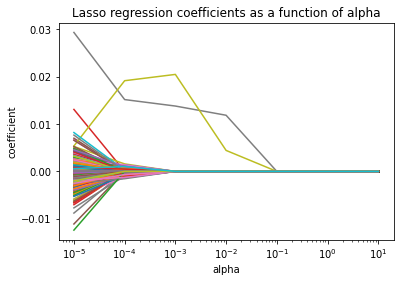

In [ ]:
# Plot the coefficients of the model as a function of alpha, alpha should be on the log scale
coef_df.plot(logx=True, legend=False)
plt.xlabel('alpha')
plt.ylabel('coefficient')
plt.title('Lasso regression coefficients as a function of alpha')

Text(0.5, 1.0, 'Number of non-zero coefficients as a function of alpha')

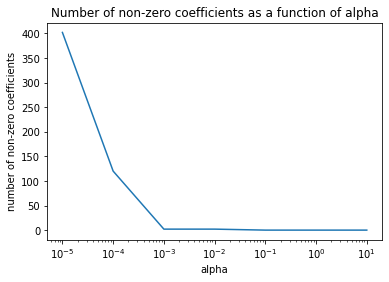

In [ ]:
# Plot the number of non-zero coefficients as a function of alpha
coef_df.apply(lambda x: x != 0).sum(axis=1).plot(logx=True)
plt.xlabel('alpha')
plt.ylabel('number of non-zero coefficients')
plt.title('Number of non-zero coefficients as a function of alpha')


## Your Answer
Written answer to 2.3 here 

The choice of $λ$ affect the performance of the model because as $λ$ increases, the number of non-zero coef decreases, so the right choice of $λ$ would enhance the performance of the model.

The $λ$ value that gives the best performance on the test data is 0.001.

# Question 3 (10 points)
In this question, we will use the data from a recent nature paper [The evolution, evolvability and engineering of gene regulatory DNA](https://www.nature.com/articles/s41586-022-04506-6). 
 In this paper, the authors introduce random sequences of DNA as promoters and measure the expression of a gene in the presence of these promoters.

To make the computation faster, we will downsample the training data by 1% and keep all the test data. This means that you will only use 1% of the training data to train your models, but you will have access to all of the test data for evaluation.

Your goal is to use kmer models with k=3 and k=4 to predict gene expression for a given promoter sequence.

A kmer model is a statistical model that counts the occurrence of substrings of length k (called kmers) in a DNA sequence. These kmers are then used as features to predict the gene expression level. The kmer feature space is created by enumerating all possible substrings of length k that can be formed from the DNA sequence. 

For example, if we have a promoter sequence "ACTGACGTG", and we use k=3, the feature space is all possible 3-mers, which are $4^3$ features. Based on the sequence, we can generate a set of 3-mers (or kmers) by sliding a window of length 3 along the sequence: "ACT", "CTG", "TGA", "GAC", "ACG", "CGT", "GTG". These kmers can then be used as features for prediction.

The kmer model assumes that the count of each kmer in the promoter sequence is related to the gene expression level. The intuition behind this assumption is that certain kmers are more likely to bind to specific transcription factors, which in turn can activate or repress the expression of the gene. The kmer model captures this relationship by assigning a weight to each kmer, indicating its importance for prediction.

In [ ]:
# load data
train_data = pd.read_csv('./data/Q3.train_downsample.csv', header=None) 
test_data = pd.read_csv('./data/Q3.test.csv', header=None)

In [ ]:
train_data

,0,1
0,TGCATTTTTTTCACATCGTAACGGTGTCGACCATTTGCGGGGTCGA...,12.893700
1,TGCATTTTTTTCACATCCCTCAGAGCGACTTAGAGATCGCAGAATC...,14.000000
2,TGCATTTTTTTCACATCGTAGTGCGGATTCCGCAGATTGCAACGAA...,3.000000
3,TGCATTTTTTTCACATCCTTATACTTTTGGGGGCGGAGCTGAGCAT...,12.808580
4,TGCATTTTTTTCACATCGGAATGAAGGAGGCCACCGGGCTGGTGCT...,12.000000
...,...,...
313489,TGCATTTTTTTCACATCCGTATGCTCTGTCACCAAACTGGAGATGA...,11.000000
313490,TGCATTTTTTTCACATCAGTATGTTTAATGTTCTCCTGTTCAGGTC...,1.000000
313491,TGCATTTTTTTCACATCTCTGTCGGTGAGAAGAGGGGTACATCAGG...,7.318721
313492,TGCATTTTTTTCACATCAGGGCATGTTGTTGTGCTTAGTGAACCAT...,6.256488


In [ ]:
test_data

,0,1
0,TGCATTTTTTTCACAAGAGCACTTGAAGGGCGCCTATGACAAGGGA...,13.708592
1,TGCATTTTTTTCACACATATACTTGGGTGACTTAGATATTTGCATG...,2.553335
2,TGCATTTTTTTCACACATCTGGATTGTCTGGTGTGCTGGTATCTTC...,13.369969
3,TGCATTTTTTTCACACCACCGTGGGGATTCGCAGCTATGTGCATAA...,3.328683
4,TGCATTTTTTTCACACCATGGATTTAAGAATTAATCACCGGACAAC...,10.466688
...,...,...
3326,TGCATTTTTTTCACTCTTTCACGTGGGGCCTGCGGGGTATCGGTGA...,14.962475
3327,TGCATTTTTTTCACTGATGTGGTGCGCGTAATTTCTTTGTTGTGTT...,11.999880
3328,TGCATTTTTTTCACTTCCAGTAATATGCGAAAGGGTGATGTGAACT...,4.541188
3329,TGCATTTTTTTCACTTCGCACTCCACTTCTCGGTTTCTGGTATTAT...,7.456650


First, we provide this function to create a dictionary where the keys are kmer strings and the value for each key is an integer index. This function will help you consistently index kmers throughout the rest of the problem.

In [ ]:
def create_kmer_dict(k):
    # Create dictionary where the keys are kmer strings, and the value for each key is an integer index,
    #  i.e. kmer_dict.values should return an np.array equal to range(4**k) This function will be used to
    #  create consistent indexing for kmers across the other functions in this cell & notebook.
    bases = ['A', 'C', 'G', 'T']
    
    kmers = [''.join(i) for i in itertools.product(bases, repeat = k)]
    kmer_dict = {}
    
    for i in range(len(kmers)):
        kmer_dict[kmers[i]] = i 
        
    return kmer_dict

Next, you need to fill in this function to create a feature matrix for the sequences. Given a list of sequences S and a list of kmers K, this function should create a len(S) by len(K) feature matrix countaining the count of each kmer in each sequence.

In [ ]:
def create_feature_matrix(s, kmer_dict,k):
    #creates feature matrix for a list of sequences 
    #input: list of sequences s 
    #output: feature matrix of len(s) x len(kmer_dict.keys())
    bases = ['A', 'C', 'G', 'T']
    counts = np.zeros((len(s), len(bases)**k)) 

    for i in range(len(s)): 
      string = s[i]
      
      for j in range(len(string)-(k-1)): 
          current_kmer = string[j:j+k]
      
          index = kmer_dict.get(current_kmer, None)
          if index is not None:
            counts[i][index] += 1    
       
    return counts

## (Optional) 

Reimplement create_feature_matrix to make the function more efficient. 

## Task: 
Using create_kmer_dict and create_feature_matrix, get the feature matrix for the training data for k=3. As in question 2, fit a linear model on the training X and y data. 
Next, use this model to predict expression values based on the training and test X data. Use plt.scatter to plot your observed vs. predicted values for the train and test dataset. Report the MSE error as well as the Rearson R (you can use pearsonr from scipy.stats) between observed and predicted values for both train and test set. Repeat this process for k=4, and list these results below. 

## Notes: 
* Because the size of the training data is still relatively large, the create_feature_matrix may some time to run -- around 3 minutes for k=3, 10 mintues for k=4. 
* Because the expression data was "binned" in the experimental data, you will see vertical lines at integer values in your training scatterplots (this is ok!)  

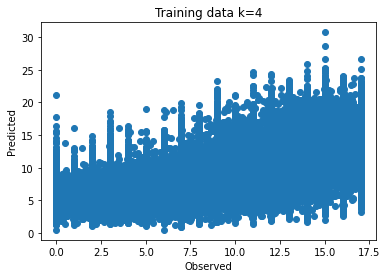

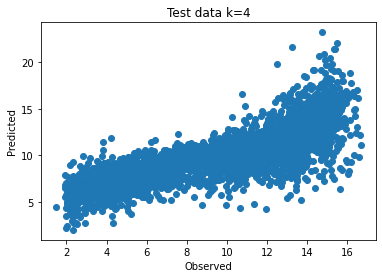

Training data MSE: 8.898069973261281
Training data Pearson R: 0.7126812060374128
Test data MSE: 6.009244320616355
Test data Pearson R: 0.8077279226866213
Top 10 kmers with their associated weights:
('CAAC', -6.974214626327475)
('TAAC', -6.246003863036069)
('AAAC', -6.229163223576814)
('AACG', 6.011677244340834)
('CAAT', -4.797412741876667)
('AACT', 4.643612038359429)
('CGTC', -4.536832693105344)
('GAAC', -4.4863149387771895)
('TACG', 4.404243008708825)
('AACC', 4.356402097169184)


In [ ]:
k = 4

kmer_dict = create_kmer_dict(k)

train_X = create_feature_matrix(train_data[0], kmer_dict, k)
train_y = train_data[1]
test_X = create_feature_matrix(test_data[0], kmer_dict, k)
test_y = test_data[1]

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_error = mean_squared_error(train_y, train_pred)
train_pearson_r, _ = pearsonr(train_y, train_pred)

test_pred = model.predict(test_X)
test_error = mean_squared_error(test_y, test_pred)
test_pearson_r, _ = pearsonr(test_y, test_pred)

plt.scatter(train_y, train_pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Training data k=' + str(k))
plt.show()

plt.scatter(test_y, test_pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Test data k=' + str(k))
plt.show()

print('Training data MSE:', train_error)
print('Training data Pearson R:', train_pearson_r)
print('Test data MSE:', test_error)
print('Test data Pearson R:', test_pearson_r)

coef_dict = {}
for i in range(len(kmer_dict)):
    coef_dict[list(kmer_dict.keys())[i]] = model.coef_[i]

sorted_coefs = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)
print('Top 10 kmers with their associated weights:')
for i in range(10):
    print(sorted_coefs[i])

## 3.1 Show k=3 results below, including: (4 points)
* Scatter plot between observed and predicted for training data 
* Training data MSE
* Training data Pearson R
* Scatter plot between observed and predicted for test data 
* Test data MSE
* Test data Pearson R
* Show which features (k-mers) are important for the predictions

## Your Answer
Report numerical results for 3.1 here

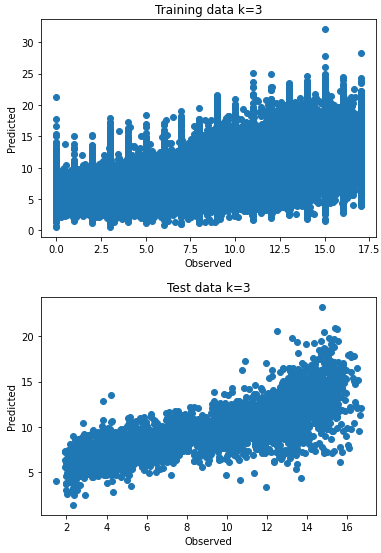
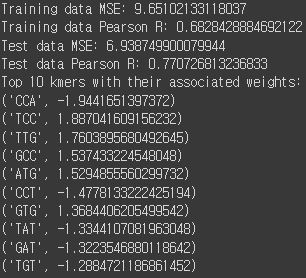

## 3.2 Show k=4 results here, including: (4 points)
* Scatter plot between observed and predicted for training data 
* Training data MSE
* Training data Pearson R
* Scatter plot between observed and predicted for test data 
* Test data MSE
* Test data Pearson R
* Show which features (k-mers) are important for the predictions

## Your Answer
Report numerical results for 3.2 here

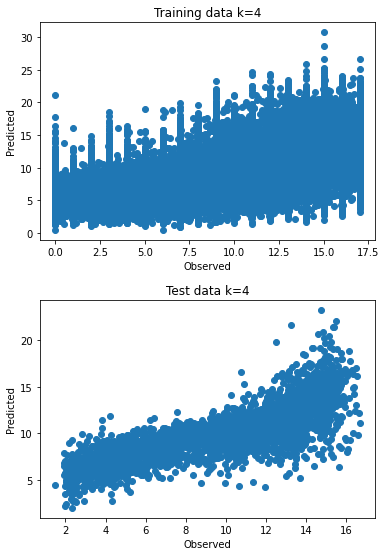
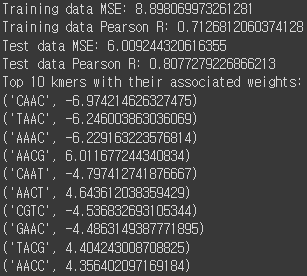

## 3.3 Reflection: answer the questions below: (2 points)
* What differences do you notice in MSE and Pearson R between models trained with different values of k? 
* What would be one potential benefit and one potential drawback of creating a model with a larger value for k? 



## Your Answer
Answer 3.3 here. 

When k increases, MSE decreases and PR increases.

One benefit would be that it can have a better predictive performance because it can have more complex patterns in the data.
Obe drawback would be that it is more expensive in terms of computation to create the model because when k increases, it is exponentially larger.

## (Optional) Question 4

Repeat the process in Question 3, but with a lasso regression. Select the proper pernalty, show which features (k-mers) are important for the predictions, and compare the difference between these results and your results from Question 3. 